In [2]:
#importing the required libraries
import sys
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
style.use('ggplot')

In [3]:
#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [4]:
#Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = X[:56000], X[56000:], y[:56000], y[56000:]

In [5]:
#Building the Linear classifier model by changing the n_iter as the hyperparameter
# Used the cros_val_score cross validation method
# For every n_iter values accuracy of all the 3 folds and their average is calculated

In [87]:
for i in range(1,11):
    clf = SGDClassifier(random_state = 42, n_iter=i)
    train_acc = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print("Iterations No: " +str(i))
    print("1st fold accuracy- %.2f%%" %(100*train_acc[0]))  
    print("2nd fold accuracy- %.2f%%" %(100*train_acc[1]))
    print("3rd fold accuracy- %.2f%%" %(100*train_acc[2]))
    print("Average fold accuracy- %.2f%%" %((100*train_acc[2] + 100*train_acc[1] + 100*train_acc[0])/3))

Iterations No: 1
1st fold accuracy- 87.02%
2nd fold accuracy- 87.21%
3rd fold accuracy- 84.76%
Average fold accuracy- 86.33%
Iterations No: 2
1st fold accuracy- 86.34%
2nd fold accuracy- 87.05%
3rd fold accuracy- 83.64%
Average fold accuracy- 85.67%
Iterations No: 3
1st fold accuracy- 85.90%
2nd fold accuracy- 84.06%
3rd fold accuracy- 84.45%
Average fold accuracy- 84.80%
Iterations No: 4
1st fold accuracy- 86.59%
2nd fold accuracy- 81.29%
3rd fold accuracy- 87.88%
Average fold accuracy- 85.26%
Iterations No: 5
1st fold accuracy- 84.91%
2nd fold accuracy- 86.12%
3rd fold accuracy- 87.15%
Average fold accuracy- 86.06%
Iterations No: 6
1st fold accuracy- 85.61%
2nd fold accuracy- 87.67%
3rd fold accuracy- 88.13%
Average fold accuracy- 87.13%
Iterations No: 7
1st fold accuracy- 87.83%
2nd fold accuracy- 88.20%
3rd fold accuracy- 87.55%
Average fold accuracy- 87.86%
Iterations No: 8
1st fold accuracy- 84.80%
2nd fold accuracy- 85.86%
3rd fold accuracy- 85.24%
Average fold accuracy- 85.30%


In [88]:
#Choosing the suitable n_iter values
#Performing the accuracy test on the training data

In [6]:
clf = SGDClassifier(random_state =42, n_iter=7)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: %.2f%%" % (accuracy*100))

Training Accuracy: 87.86%


In [7]:
#Printing the confusion matrix for the training set


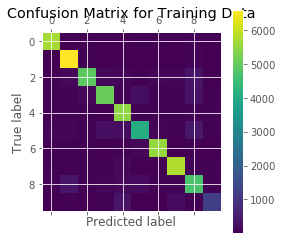

In [8]:
train_conf_mat = confusion_matrix(y_train,y_train_pred)
plt.matshow(train_conf_mat)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
#Priting the error values of the confusion matrix

In [10]:
import seaborn as sns
val_row= train_conf_mat.sum(axis=1, keepdims=True)
train_err_conf_mat = train_conf_mat / val_row
np.fill_diagonal(train_err_conf_mat, 0)
ax = sns.heatmap(train_err_conf_mat,annot=True)

In [11]:
#Chose the suitable n_iter and performing the fit
#Testing the model
#Calculating the accuracy of the test data

In [12]:
clf = SGDClassifier(random_state =42, n_iter=7)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Data Accuracy: %.2f%%" % (accuracy*100))

Test Data Accuracy: 85.10%


In [13]:
#Printing the confusion matrix

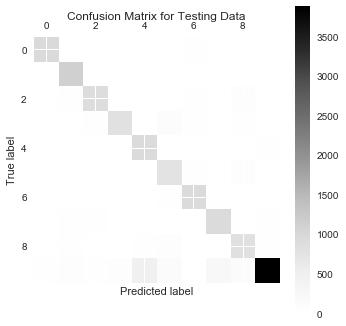

In [15]:
test_conf_mat = confusion_matrix(y_test,y_pred_test)
plt.matshow(test_conf_mat)
plt.title('Confusion Matrix for Testing Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Priting the error values of the confusion matrix

In [19]:
row_sums = test_conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = test_conf_mat / row_sums
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)